In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
import numpy as np
import math

Let

$
z = w^Tx = w_0 + w_1x_1 + w_2x_2 + \dots w_p x_p\\
g(z) = \dfrac{1}{1+e^{-z}}\\
$

then our logistic regression model is given by: 

$
h_w(x)= g(w^Tx)
$

In [21]:
def sigmoid(weights, samples):
    return 1 / (1 + np.exp(np.dot(weights, samples)))

We could proceed as for linear regression by using the mean-squared error as our loss function. Unfortunately because of the non-linear nature of the sigmoid function, this loss function is not convex and so there are many local optima. This is a problem for gradient descent algorithm as it may not converge to the global minimum. Cross-entropy loss measures the performance of a classifier that outputs a 0 or 1. For a single training example (x,y) we define this as: 

$
\mathcal{L}(h_w, y) = 
     \begin{cases}
       -\text{log}(h_w(x)) \quad\text{if }y=1\\
       -\text{log}(1 - h_w(x)) \quad\text{if }y=0\\
     \end{cases}
$

We can plot these loss functions for y = 0 and y = 1

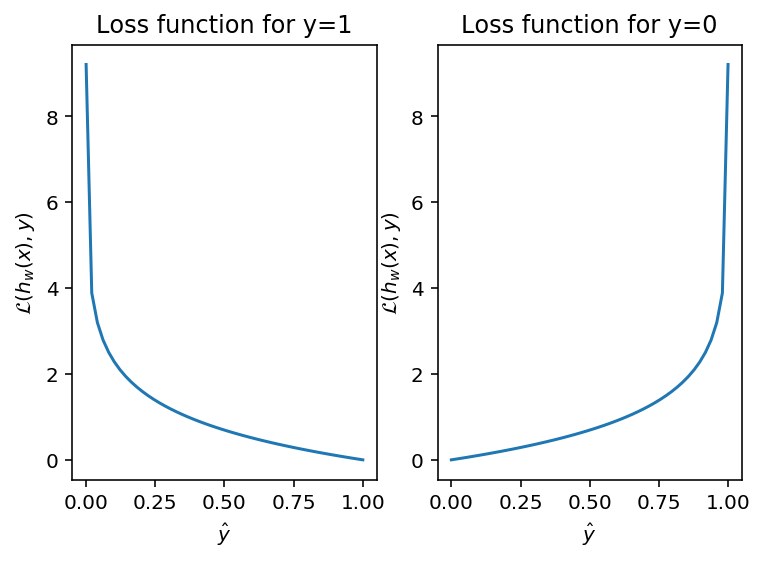

In [6]:
h_w = np.linspace(0.0001, 0.9999, 50)
cost_y1 = -np.log(h_w)
cost_y0 = -np.log(1-h_w)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.set_title("Loss function for y=1")
ax.set_xlabel(r"$\hat{y}$")
ax.set_ylabel(r"$\mathcal{L}(h_w(x), y)$")
ax.plot(h_w, cost_y1)

ax = axs[1]
ax.set_title("Loss function for y=0")
ax.set_xlabel(r"$\hat{y}$")
ax.set_ylabel(r"$\mathcal{L}(h_w(x), y)$")
ax.plot(h_w, cost_y0)

We can see that when the prediction is close the actual value of y then the loss functions are small. Conversly when the predictions are far from the actual y values then the loss is large. Therefore, we are penalised more when our predictions are further from the truth!

It is actually possible to rewrite the loss function above as a single function as follows:

$
\mathcal{L}(h_w, y) =-y\,\text{log}(h_w(x)) - (1-y)\text{log}(1 - h_w(x))
$

The above accounts for the loss for a single training example, we define a cost funtion $\mathcal{J}$ that is the average loss across all the training examples:

$
\mathcal{J}(w) =-\frac{1}{N}\sum_{i=0}^{N}\left[{y^{(i)}\,\text{log}(h_w(x^{(i)})) + (1-y^{(i)})\,\log(1 - h_w(x^{(i)}))}\right]
$

where $x^{(i)}$ represents the $i^{th}$ training example. Our goal then is to find the $w$ values that minimise $\mathcal{J}$. We will do this using gradient descent approach and for this the first thing we need to compute the deriviative $\mathcal{J}$ with respect to our weights $w_j$. 

In the following steps, we will use the notation $wx^{i}$ to mean $w_0 + w_1x_1^{i} + w_2x_2^{i} + \dots + w_px_p^{i}$

We can simplify $\mathcal{J}(w)$ by noting that:


$
\begin{align}
\log(h_w(x^{i})) &= \log \left( \dfrac{1}{1+e^{-wx^{i}}}\right)\\
&= \log(1) - \log(1+e^{-wx^{i}})\\
&= - \log(1+e^{-wx^{i}})
\end{align}
$

and

$
\begin{align}
\log(1 - h_w(x^{i})) &= \log \left( 1 - \dfrac{1}{1+e^{-wx^{i}}}\right)\\
&=\log\left(\dfrac{e^{-wx^{i}}}{1 + e^{-wx^{i}}}\right)\\
&=\log\left( e^{-wx^{i}} \right) - \log\left( 1 + e^{-wx^{i}} \right)\\
&=-wx^{i} - \log\left(1 + e^{-wx^{i}}\right)
\end{align}
$

Substituting these results back into $\mathcal{J}(w)$:

$
\begin{align}
\mathcal{J}(w) &= \dfrac{1}{N} \sum_{i=0}^{N} \left[ y^{i}\log\left( 1 + e^{-wx^{i}}\right) + (1-y^{i})\left( wx^{i} + \log\left( 1 + e^{-wx^{i}} \right)\right)\right]\\
&= \dfrac{1}{N} \sum_{i=0}^{N} \left[ y^{i}\log\left( 1 + e^{-wx^{i}}\right) + wx^{i} + \log\left( 1 + e^{-wx^{i}} \right) -y^{i}wx^{i} -y^{i}\log\left( 1 + e^{-wx^{i}} \right) \right]\\
&= \dfrac{1}{N} \sum_{i=0}^{N} \left[ wx^{i} + \log\left( 1 + e^{-wx^{i}} \right) -y^{i}wx^{i} \right]\\
\end{align}
$

Then by writing $wx^{i}$ as $\log\left( e^{wx^{i}}\right)$ we get: 

$
\begin{align}
\mathcal{J}(w) &= \dfrac{1}{N} \sum_{i=0}^{N} \left[ \log\left( e^{wx^{i}}\right) + \log\left( 1 + e^{-wx^{i}} \right) -y^{i}wx^{i} \right]\\
\end{align}
$

and then using $\log\left(a\right) + \log\left(b\right) = \log \left( ab\right)$:

$
\begin{align}
\mathcal{J}(w) &= \dfrac{1}{N} \sum_{i=0}^{N} \left[ \log\left( 1 + e^{wx^{i}} \right) -y^{i}wx^{i} \right]\\
\end{align}
$

Then we need to find the deriviatives:

$
\begin{align}
&\frac{\partial}{\partial w_j }\log\left( 1 + e^{wx^{i}} \right) = \dfrac{x_j^{i}e^{wx^{i}}}{1 + e^{wx^{i}}} = x_j^{i} h_{w}\left( x^{\left(i\right)}\right)\\
&\frac{\partial}{\partial w_j }y^{i}wx^{i} = y^{i}x_{j}^{i}
\end{align}
$

Therefore, we have:

$
\begin{align}
\frac{\partial \mathcal{J}\left(w\right)}{\partial w_j } &= \dfrac{1}{N} \sum_{i=0}^{N} x_j^{i} h_{w}\left( x^{\left(i\right)}\right) - y^{i}x_{j}^{i} \\
&= \dfrac{1}{N} \sum_{i=0}^{N} \left(h_{w}( x^{\left(i\right)}) - y^{i}\right)x_j^{i}
\end{align}
$


Generate fake data

In [172]:
N = 1000
D = 3

X = 5 * np.random.randn(N,D)
w = np.random.randn(D, 1)
y = X.dot(w)

y[y>0] = 1
y[y<=0] = 0

In [173]:
X_train = X[1:100]
y_train = y[1:100]

X_test = X[100:]
y_test = y[100:]

In [174]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [175]:
xs = np.linspace(-10,10,50)
logit_x = [logit(x) for x in xs]

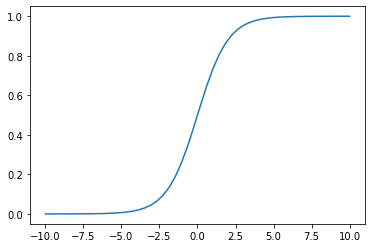

In [176]:
plt.plot(xs,logit_x)

The weight update rule for logisitc regression is as folows: 

In [177]:
%%latex
\[   
w_i := w_i + \alpha (y - h_w(x))\, h(x)\, (1-h(x)) \,x_i \\
w_i := w_i + \alpha (y - \text{logit}(w \cdot x))\, \text{logit}(w \cdot x)\, (1-\text{logit}(w \cdot x)) \,x_i
\]

<IPython.core.display.Latex object>

create a function to perform the weight update

In [179]:
def update_weights(x,y,w,alpha):
    a = sigmoid(np.dot(w,x))
    w_new = w + alpha * (y-a) * a * (1-a) * x
    return w_new

In [180]:
def gradient_descent(X, y, n_iters=1000, alpha=0.01):
    # pick a random w to start
    w = np.random.randn(D) * 1/np.sqrt(D)
    
    for i in range(n_iters):
        index = np.random.choice(X.shape[0], 1, replace=False)
        rand_x = X[index][0]
        rand_y = y[index][0]
        w = update_weights(x=rand_x, y=rand_y, w=w, alpha=alpha)
    return w

In [181]:
w_learnt = gradient_descent(X_train, y_train)

In [182]:
w_learnt

array([-0.68833385, -0.06938553, -0.30617438])

In [200]:
np.round(1 /(1 + np.exp(-np.dot(X_test, w_learnt))),2)[0:10]

array([0.92, 0.78, 0.99, 0.38, 0.99, 0.93, 0.2 , 1.  , 0.96, 0.39])

In [190]:
X_test[0]

array([-2.82670758, -2.60806618, -1.14461637])

In [192]:
w_learnt

array([-0.68833385, -0.06938553, -0.30617438])

In [194]:
np.dot(X_test[0], w_learnt)

2.477132767222085